Лабораторна робота 1.1 Візуалізація Matplotlib
Виконав: Сорокін Олександр Віталійович ФІТ 4-6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
spotify_data = pd.read_csv("spotify-2023.csv", encoding='cp1251')
print(spotify_data.head())

                            track_name    artist(s)_name  artist_count   
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2  \
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists   
0           2023               7            14                   553  \
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode   
0                147  141381703               

In [3]:
miss_val = spotify_data.isnull().sum()
print(miss_val)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [4]:
spotify_data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

1.Побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10
найпопулярніших пісень на Spotify у 2023 році за кількістю
прослуховувань.

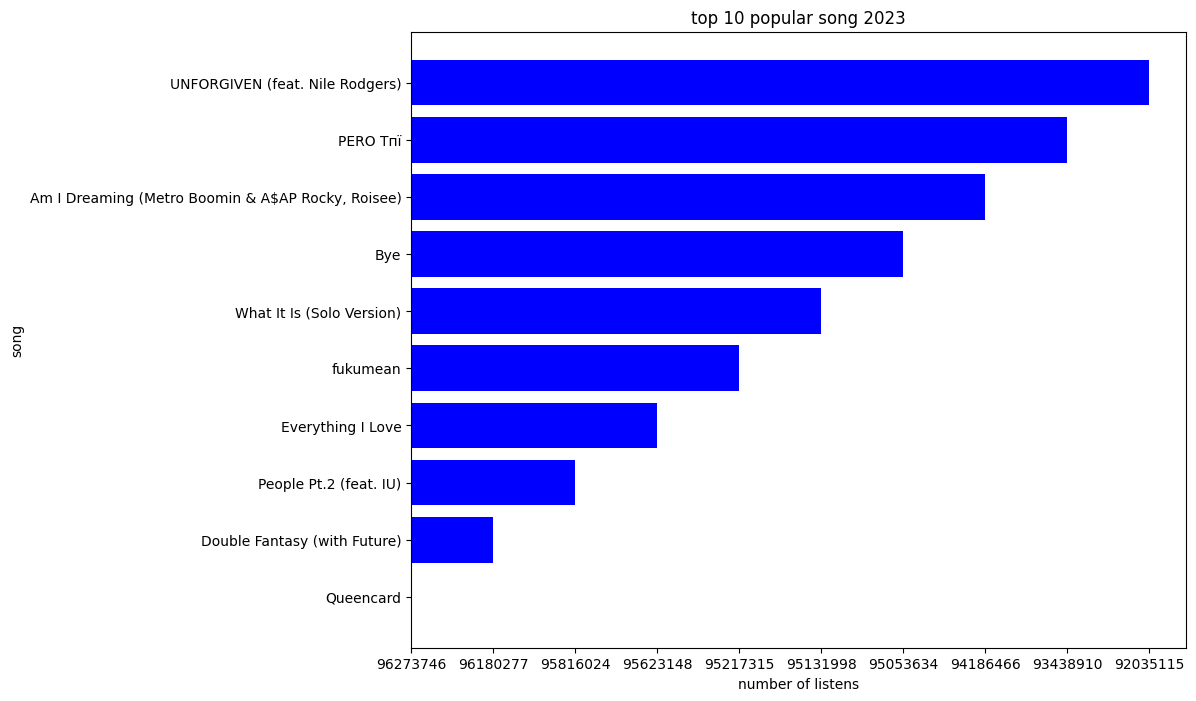

In [6]:
s_2023 = spotify_data[spotify_data["released_year"] == 2023]
popular_songs = s_2023.sort_values(by = "streams", ascending = False).head(10)

plt.figure(figsize=(10,8))
plt.barh(popular_songs["track_name"], popular_songs["streams"], color='b')
plt.xlabel("number of listens")
plt.ylabel("song")
plt.title("top 10 popular song 2023")
plt.show()

1.2 Побудувати кругову діаграму для тих самих даних

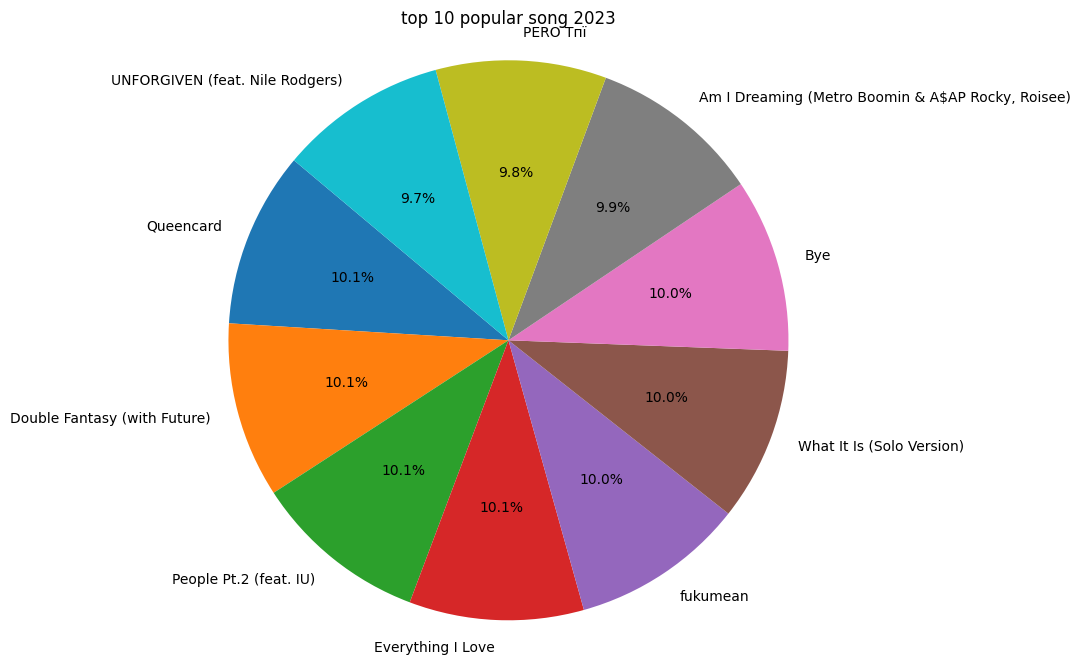

In [8]:
plt.figure(figsize=(10,8))
plt.pie(popular_songs["streams"], labels=popular_songs["track_name"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("top 10 popular song 2023")
plt.show()

2.Створіть кругову діаграму або секторну діаграму, яка відображає розподіл
за danceability серед найпопулярніших пісень у 2023 році

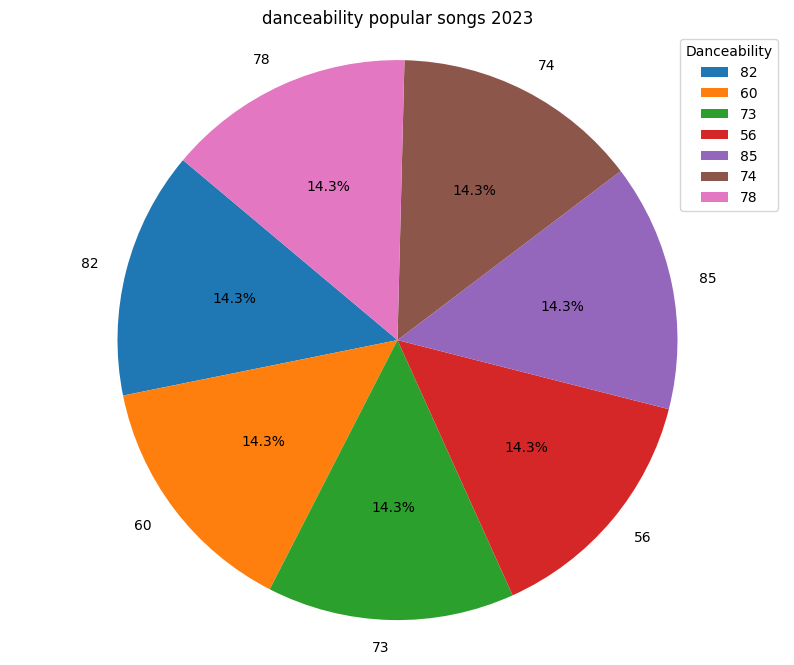

In [13]:
seven_popular_songs = s_2023.sort_values(by="streams", ascending=False).head(7)
danceability = seven_popular_songs["danceability_%"].value_counts()
plt.figure(figsize=(10,8))
plt.pie(danceability, labels=danceability.index, autopct="%1.1f%%", startangle=140)
plt.axis('equal')
plt.title("danceability popular songs 2023")
plt.legend(title="Danceability", loc="best")
plt.show()

3.Побудуйте лінійний графік, який відображає зміни кількості прослуховувань
певного треку протягом року 2023 року

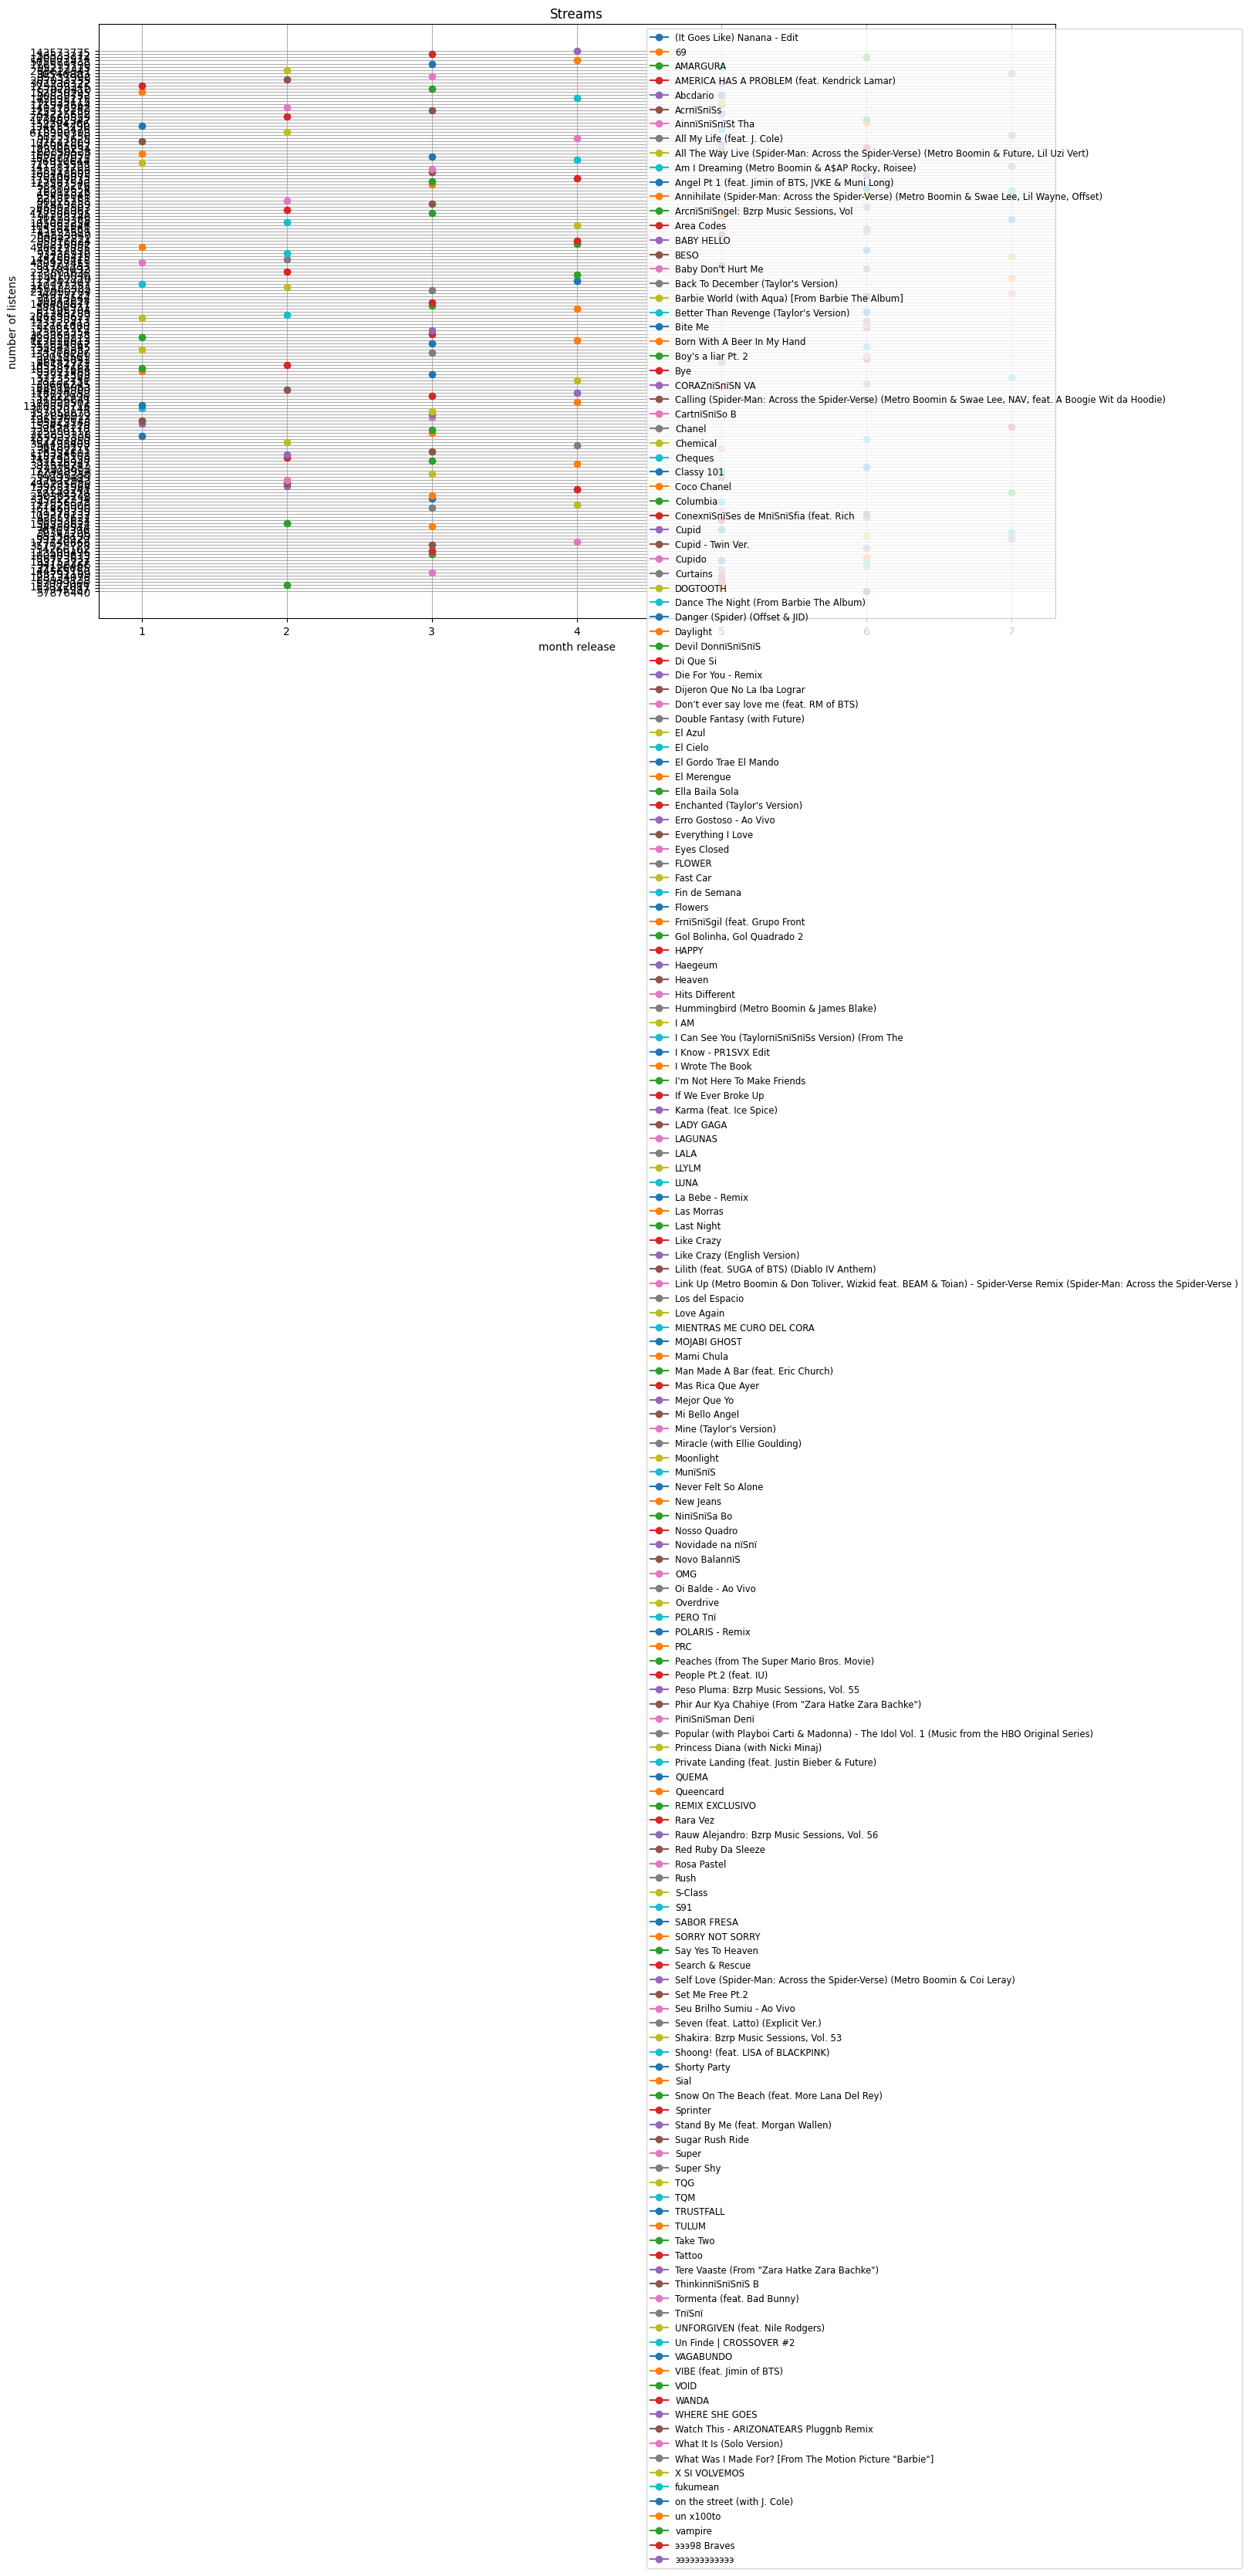

In [22]:
plt.figure(figsize=(16,10))
for track_name, track_data in s_2023.groupby('track_name'):
    plt.plot(
        track_data['released_month'],
        track_data['streams'],
        marker='o',
        linestyle='-',
        label=track_name
    )

plt.xlabel("month release")
plt.ylabel("number of listens")
plt.title("Streams")
plt.xticks(s_2023['released_month'].unique())
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1), fontsize='small')
plt.grid(True)
plt.show()

4.Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших
артистів на Spotify у 2023 році за кількістю слухачів.

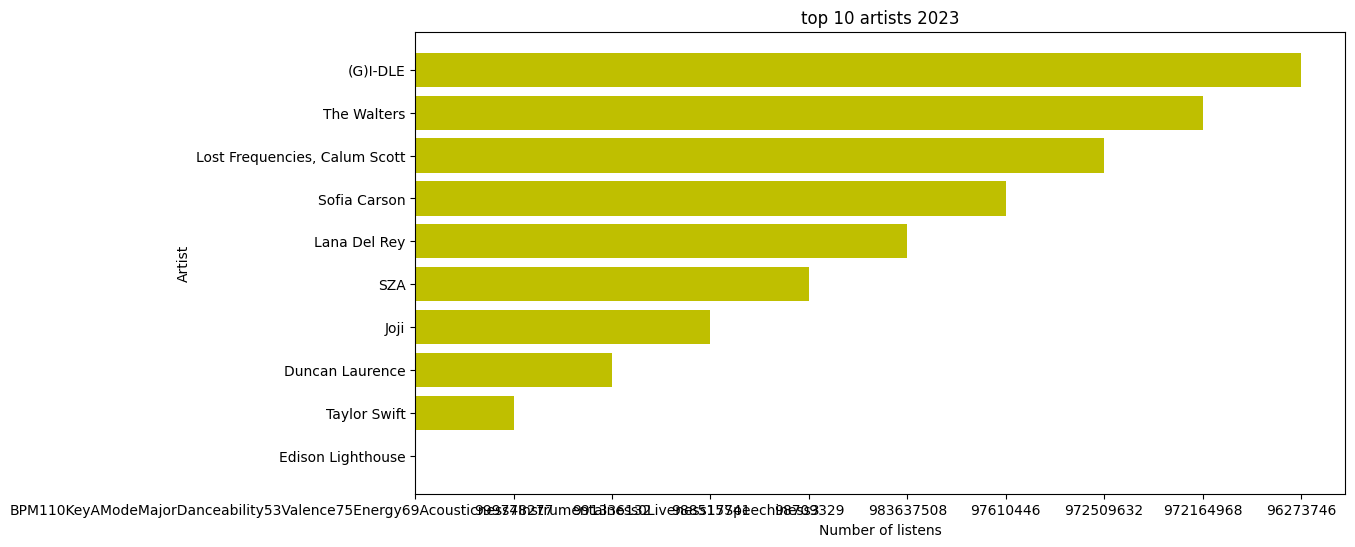

In [23]:
spotify_data = spotify_data.sort_values(by='streams', ascending=False)
top_10_artists = spotify_data.head(10)
plt.figure(figsize=(12,6))
plt.barh(top_10_artists['artist(s)_name'], top_10_artists['streams'], color='y')
plt.xlabel("Number of listens")
plt.ylabel("Artist")
plt.title("top 10 artists 2023")
plt.show()

5.Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість
прослуховувань трьох конкретних треків у 2023 році.

In [24]:
import random
rnd_tracks = random.sample(list(s_2023['track_name']), 3)
rnd_data =s_2023[s_2023['track_name'].isin(rnd_tracks)]
print(rnd_data)

                                  track_name   
6                            Ella Baila Sola  \
272        Princess Diana (with Nicki Minaj)   
280  Watch This - ARIZONATEARS Pluggnb Remix   

                                    artist(s)_name  artist_count   
6                       Eslabon Armado, Peso Pluma             2  \
272                         Nicki Minaj, Ice Spice             2   
280  sped up nightcore, ARIZONATEARS, Lil Uzi Vert             3   

     released_year  released_month  released_day  in_spotify_playlists   
6             2023               3            16                  3090  \
272           2023               4            14                  1444   
280           2023               2             5                  1638   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode   
6                   50  725980112                  34  ...  148   F  Minor  \
272                  4  104992946                   0  ...  148   A  Major   
280

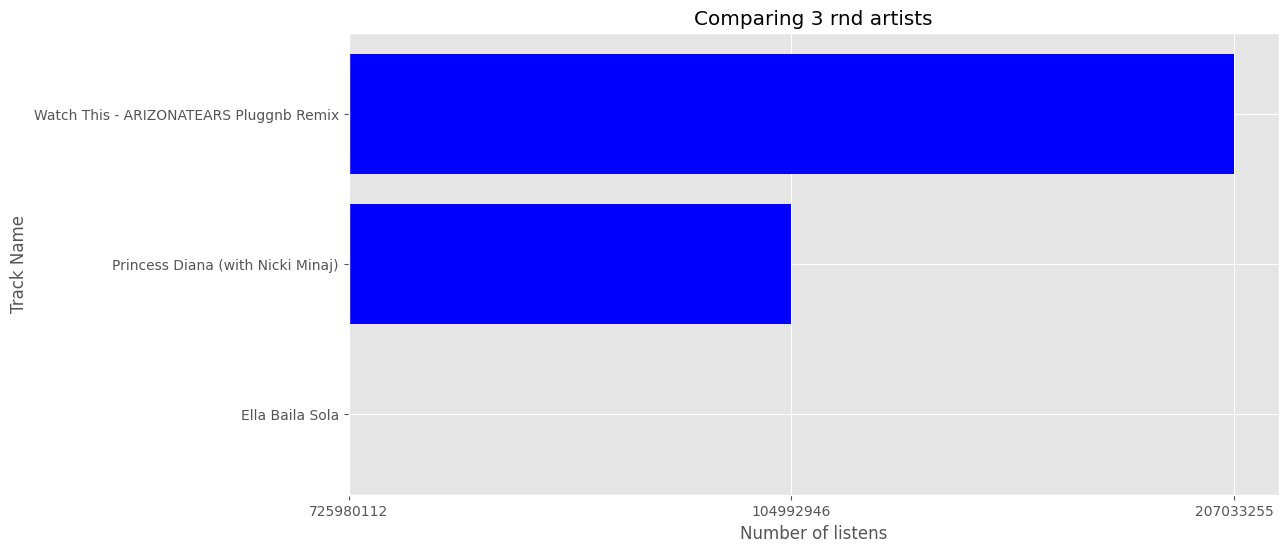

In [25]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.barh(rnd_data['track_name'], rnd_data['streams'], color='b')
plt.xlabel("Number of listens")
plt.ylabel("Track Name")
plt.title("Comparing 3 rnd artists")
plt.show()